## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout


def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],drp_ratio=0.2):
    
    input_layer = keras.layers.Input(input_shape)
    for i , units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = units,
                                   activation = 'relu',
                                   name = 'hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units = units,
                                   activation = 'relu',
                                   name = 'hidden_layer'+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    out = keras.layers.Dense(units = output_units,
                                   activation = 'softmax',
                                   name = 'out')(x)
    model = keras.models.Model(inputs = [input_layer],outputs=[out])
    
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.2,0.25,0.5,0.75]

In [7]:
results = {}

for D_EXP in itertools.product(Dropout_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Dropout with EXP = %.6f, " % D_EXP)
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=D_EXP)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "D_EXP-%s" % (str(D_EXP))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Dropout with EXP = 0.200000, 
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.identity (TFOpLambda)     (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.identity_1 (TFOpLambda)   (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
tf.identity_2 (TFOpLambda)   (N

C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
196/196 [==============================] - 3s 13ms/step - loss: 1.9350 - accuracy: 0.2986 - val_loss: 1.7671 - val_accuracy: 0.3707
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 1.7176 - accuracy: 0.3844 - val_loss: 1.6323 - val_accuracy: 0.4191
Epoch 3/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6194 - accuracy: 0.4224 - val_loss: 1.6019 - val_accuracy: 0.4274
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5505 - accuracy: 0.4478 - val_loss: 1.5570 - val_accuracy: 0.4484
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5019 - accuracy: 0.4658 - val_loss: 1.5267 - val_accuracy: 0.4607
Epoch 6/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4639 - accuracy: 0.4782 - val_loss: 1.4957 - val_accuracy: 0.4765
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4423 - accuracy: 0.4857 - val_loss: 1.5096 - val_accuracy: 0.4571

Epoch 1/50
196/196 [==============================] - 3s 13ms/step - loss: 1.9525 - accuracy: 0.2951 - val_loss: 1.7956 - val_accuracy: 0.3548
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 1.7166 - accuracy: 0.3846 - val_loss: 1.7067 - val_accuracy: 0.3828
Epoch 3/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6277 - accuracy: 0.4182 - val_loss: 1.5873 - val_accuracy: 0.4362
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5575 - accuracy: 0.4446 - val_loss: 1.5641 - val_accuracy: 0.4450
Epoch 5/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5138 - accuracy: 0.4612 - val_loss: 1.5546 - val_accuracy: 0.4545
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 1.4753 - accuracy: 0.4728 - val_loss: 1.4820 - val_accuracy: 0.4735
Epoch 7/50
196/196 [==============================] - 3s 13ms/step - loss: 1.4448 - accuracy: 0.4849 - val_loss: 1.4673 - val_accuracy: 0.4751

Epoch 1/50
196/196 [==============================] - 3s 14ms/step - loss: 1.9155 - accuracy: 0.3092 - val_loss: 1.7715 - val_accuracy: 0.3556
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6969 - accuracy: 0.3932 - val_loss: 1.6257 - val_accuracy: 0.4222
Epoch 3/50
196/196 [==============================] - 3s 13ms/step - loss: 1.6159 - accuracy: 0.4226 - val_loss: 1.6089 - val_accuracy: 0.4323
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5605 - accuracy: 0.4418 - val_loss: 1.5714 - val_accuracy: 0.4313
Epoch 5/50
196/196 [==============================] - 3s 13ms/step - loss: 1.5109 - accuracy: 0.4635 - val_loss: 1.5344 - val_accuracy: 0.4513
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 1.4649 - accuracy: 0.4789 - val_loss: 1.4739 - val_accuracy: 0.4753
Epoch 7/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4395 - accuracy: 0.4870 - val_loss: 1.4927 - val_accuracy: 0.4693

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 1.9323 - accuracy: 0.3009 - val_loss: 1.7469 - val_accuracy: 0.3722
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 1.7112 - accuracy: 0.3878 - val_loss: 1.6718 - val_accuracy: 0.3981
Epoch 3/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6150 - accuracy: 0.4252 - val_loss: 1.5952 - val_accuracy: 0.4234
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5516 - accuracy: 0.4453 - val_loss: 1.5239 - val_accuracy: 0.4533
Epoch 5/50
196/196 [==============================] - 3s 13ms/step - loss: 1.5171 - accuracy: 0.4563 - val_loss: 1.5448 - val_accuracy: 0.4525
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 1.4809 - accuracy: 0.4732 - val_loss: 1.4926 - val_accuracy: 0.4683
Epoch 7/50
196/196 [==============================] - 2s 13ms/step - loss: 1.4326 - accuracy: 0.4877 - val_loss: 1.4713 - val_accuracy: 0.4748

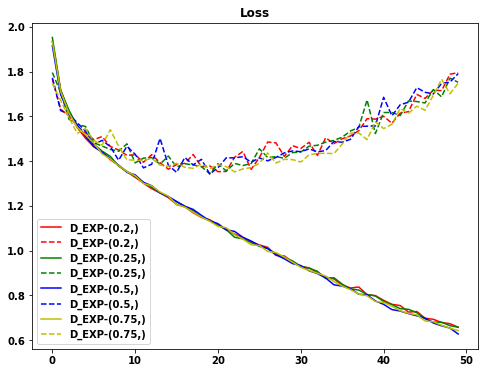

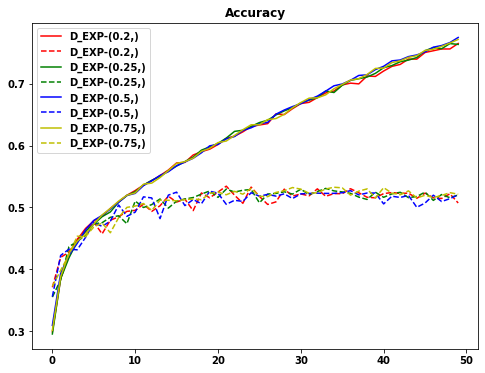

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()